In [1]:
import autograd.numpy as np

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook
%matplotlib inline
# autoreload functi"on - so if anything behind the scenes is changeed those changes
# are reflected in the notebook without having to restart the kernel
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

from numpy.fft import *
import matplotlib.style as style 
style.use('ggplot')

# import function flattening module from autograd
from autograd.misc.flatten import flatten_func

In [3]:
Y = np.loadtxt('../data/test.csv',delimiter = ' ')[0]
# X = np.loadtxt('test.csv',delimiter = ' ')[1][:20000]
X = [i for i in range(len(Y))]

In [4]:
data = Y.copy()

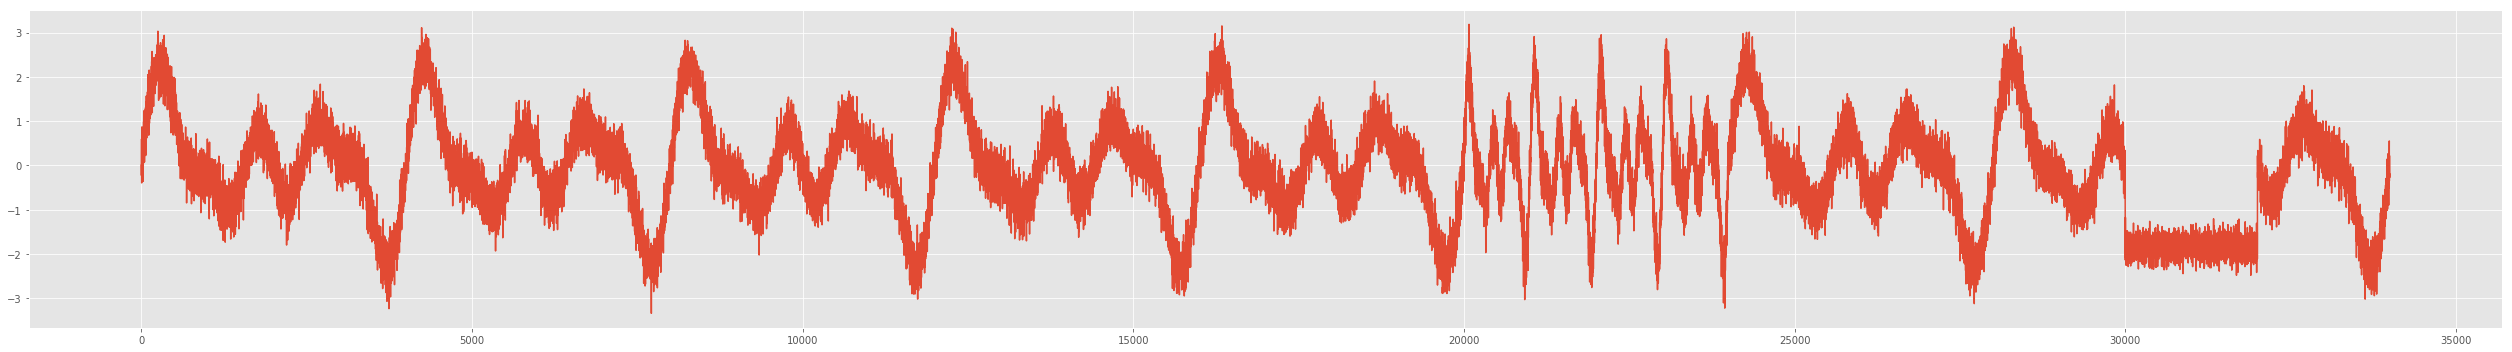

In [5]:
#Plot of all the data
plt.figure(figsize=(35,5))
plt.plot(data)
plt.show()

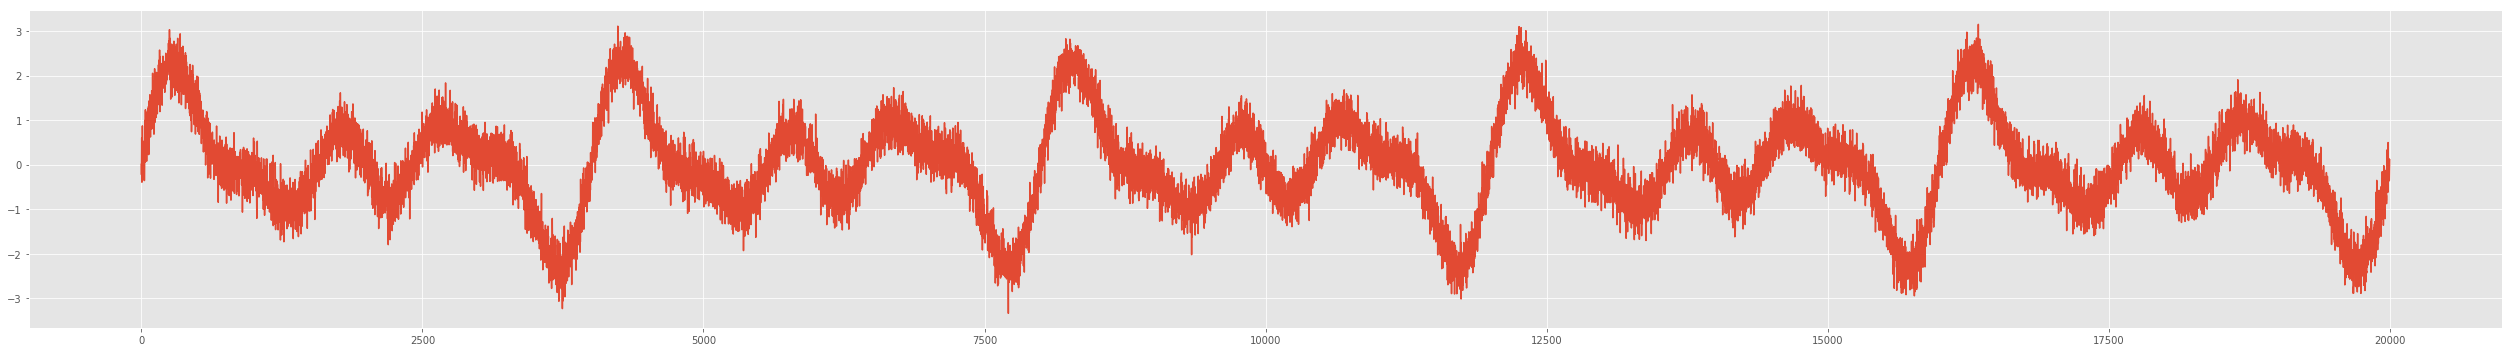

In [6]:
#Plot of a clean window of data
clean_data = data[:20000]
plt.figure(figsize=(35,5))
plt.plot(clean_data)
plt.show()

In [7]:
def filter_signal(signal, threshold=5e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [8]:
denoised_data = filter_signal(clean_data)

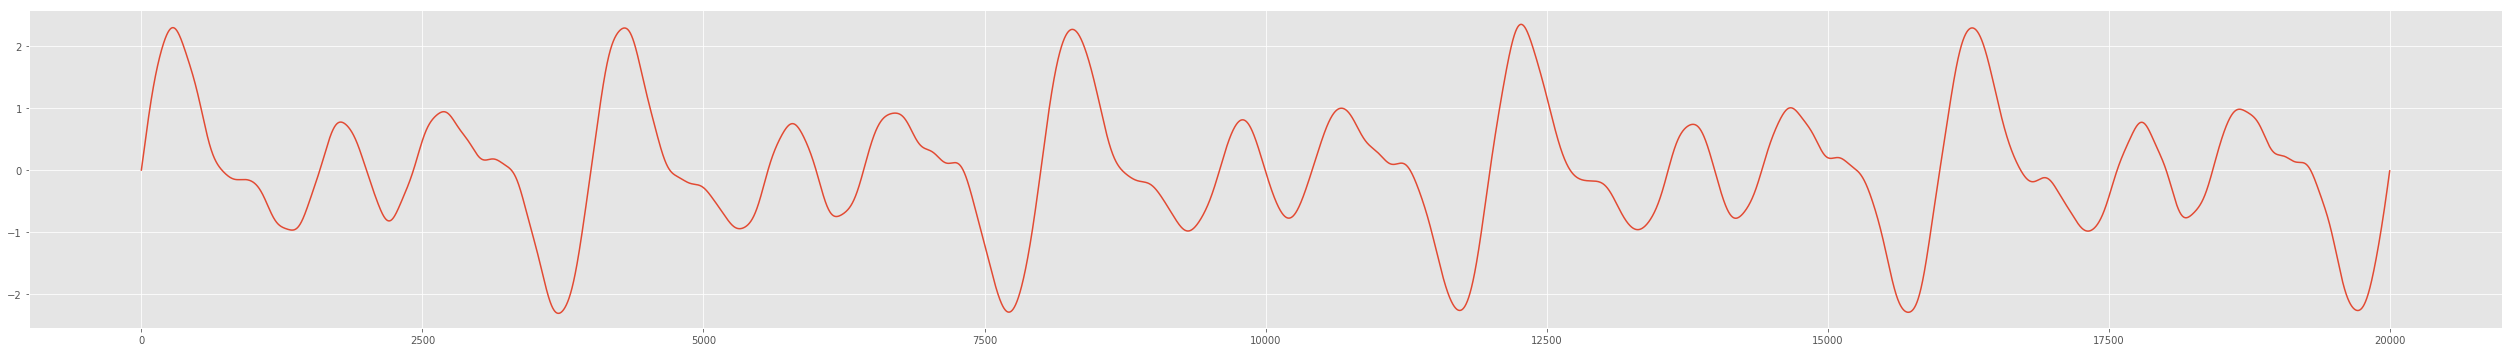

In [9]:
# Plot cleaned data by filtering out all frequencies greater than the threshold
plt.figure(figsize=(35,5))
plt.plot(denoised_data)
plt.show()

In [10]:
#Frequency analysis of the denoised data
from scipy import fftpack
X = fftpack.fft(denoised_data)
freqs = fftpack.fftfreq(len(denoised_data)) 

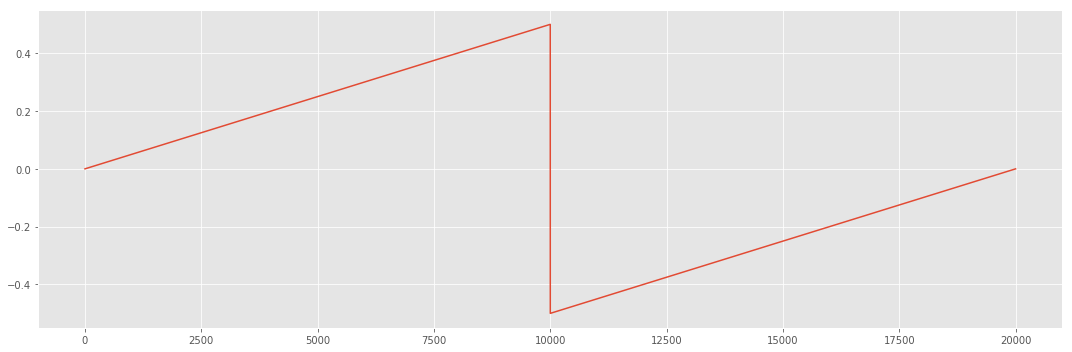

In [11]:
plt.figure(figsize=(15,5))
plt.plot(freqs)
plt.show()

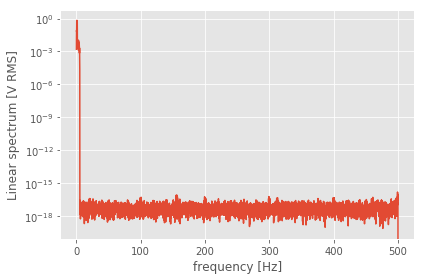

In [12]:
from scipy.signal import periodogram
f, Pxx_spec = periodogram(denoised_data, 1e3, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()